# 言語処理100本ノック 2020 (Rev 2)


## 第4章: 形態素解析

In [8]:
!head nlp100.github.io/data/neko.txt


In [11]:
#!mecab -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd nlp100.github.io/data/neko.txt >neko.txt.mecab
!mecab nlp100.github.io/data/neko.txt >neko.txt.mecab

In [12]:
!head neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ


### 30. 形態素解析結果の読み込み

In [84]:
# https://taku910.github.io/mecab/
# https://analytics-note.xyz/programming/mecab-default-format/
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

import re
lines = []
sno = 0
with open('neko.txt.mecab') as f:
  for i,line in enumerate(f):
#    if i > 20:
#      break
    if re.search(r"^EOS$",line):
      sno += 1
      continue
    if re.search(r"^$",line):
      continue
    s = line.split('\t')
    if re.search(r"^$",s[0]):
      continue
    t = s[1].split(',')
    lines.append({
      "sno": sno,
      "surface": s[0],
      "base": t[6],
      "pos": t[0],
      "pos1": t[1],
    })

lines[0:10]


[{'sno': 0, 'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
 {'sno': 2, 'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
 {'sno': 2, 'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
 {'sno': 2, 'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'sno': 2, 'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
 {'sno': 2, 'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
 {'sno': 2, 'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
 {'sno': 2, 'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
 {'sno': 3, 'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
 {'sno': 3, 'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}]


### 31. 動詞

In [85]:
{l["surface"] for l in lines if l["pos"] == "動詞"}

{'くらん',
 '略し',
 '余っ',
 '乞わ',
 '講ずる',
 '問い返さ',
 '切り落し',
 '書きゃ',
 '好み',
 '起こす',
 '並みいる',
 '恐れ入り',
 '設け',
 '呈し',
 '聴い',
 '垂らす',
 '洩',
 '吐く',
 'はいり',
 'ほめる',
 '分捕っ',
 '懸かっ',
 '舐め',
 '解し',
 '掛ら',
 '打ち明ける',
 '書き散らし',
 'たまる',
 '違っ',
 '比すれ',
 '拾う',
 'ふて',
 '掠め',
 '思い',
 '破れる',
 '茂っ',
 '貪り',
 '沸き上がっ',
 '疑',
 'しゃべり',
 '雇っ',
 '突きつけ',
 '舞い',
 '犯さ',
 '窺う',
 'くらす',
 '除い',
 '誂える',
 '起し',
 '回っ',
 'かから',
 'いらっしゃれ',
 '過ぎれ',
 '較べる',
 '飽き',
 'やりゃ',
 'ゆるめ',
 '開く',
 'くる',
 '名乗る',
 '気取っ',
 'しろ',
 '停',
 '述べよ',
 '勝れん',
 '驚か',
 '使い分け',
 '織り',
 '触る',
 '片付い',
 '飛び上がろ',
 '凋ん',
 '嗅い',
 '坐っ',
 '纏める',
 'なくなる',
 '立っ',
 '支え',
 'だす',
 'ござい',
 '通れ',
 'せまら',
 '弾か',
 '塗り',
 '果す',
 '貪る',
 '潰そ',
 '取り掛る',
 '隔て',
 '切り抜か',
 'きき',
 '拾え',
 '置い',
 'かん',
 '隣り',
 '吹きかける',
 '糺せ',
 '制する',
 'まする',
 '帰り',
 'はいっ',
 '立ち退き',
 '祟り',
 '掛り',
 'いじめ',
 '入ら',
 '食わし',
 '済む',
 '抱く',
 'なっ',
 '行う',
 '掘り出す',
 'のぞく',
 '煎じ',
 '見付かる',
 '書き付け',
 '利かし',
 '属する',
 '勤まっ',
 '御し',
 '透し',
 '済み',
 '吸い出し',
 '求め',
 '流れ',
 '与え',
 'ごまかし',
 '衒う',
 '失せ',
 'くう',
 '供える'


### 32. 動詞の基本形

In [86]:
{l["base"] for l in lines if l["pos"] == "動詞"}

{'講ずる',
 '足す',
 '起こす',
 '並みいる',
 '垂らす',
 'のろける',
 '吐く',
 '馴れる',
 'ほめる',
 '枉げる',
 '転じる',
 '打ち明ける',
 'たまる',
 '飛出る',
 '拾う',
 'さえる',
 '破れる',
 '遠のく',
 'くるむ',
 '窺う',
 'くらす',
 '誂える',
 '書き流す',
 '並べ立てる',
 '鍛え上げる',
 '較べる',
 '負える',
 '開く',
 '燻る',
 'くる',
 '拱く',
 '名乗る',
 '映る',
 '世帯染みる',
 'たらす',
 '亡ぼす',
 '触る',
 '亡くなる',
 'やって退ける',
 '纏める',
 '見積る',
 'なくなる',
 'だす',
 '富む',
 '果す',
 '貪る',
 '取り掛る',
 '張り詰める',
 '司る',
 '緩める',
 '吹きかける',
 '記す',
 '制する',
 '外れる',
 '洩れる',
 'まする',
 '行う',
 '抱く',
 '済む',
 '掘り出す',
 'うてる',
 'ゆるむ',
 'のぞく',
 '挿す',
 '攫む',
 '見付かる',
 'ききつける',
 '属する',
 '冠する',
 '見縊る',
 '衒う',
 'くう',
 'ふざける',
 '来す',
 '捻り出す',
 'せり出す',
 '洩らす',
 '供える',
 '寝かす',
 'しつくす',
 '聞える',
 'さます',
 'ごろつく',
 'とれる',
 '背負う',
 '止す',
 'めす',
 'はねる',
 '拗じる',
 'つとめる',
 '設ける',
 '反り返る',
 '突き立てる',
 '懸る',
 '潰す',
 '載る',
 '冷かす',
 '咽ぶ',
 '参る',
 'おっしゃる',
 '瞬く',
 '見る',
 'のぼる',
 '引き返す',
 '滑らす',
 '悩ます',
 '名づける',
 '隠す',
 '取上げる',
 '立ち返る',
 'もらう',
 '打つ',
 'ぶらさがる',
 'ぱちつかせる',
 '助ける',
 'もてなす',
 'たたく',
 '印す',
 '抛り出す',
 'ひねくる',
 'さげる',
 'ありがたがる',
 '出向く',
 


### 33. 「AのB」

In [87]:
anob = set()
for i,l in enumerate(lines):
  if l["surface"] != "の":
    continue
  if i < 1:
    continue
  A = lines[i-1]
  B = lines[i+1]
  if A["pos"] != "名詞" or B["pos"] != "名詞":
    continue
  anob.add("{}{}{}({}-{}-{})".format(A["surface"],l["surface"],B["surface"],A["pos"],l["pos"],B["pos"]))
anob

{'胎毒のため(名詞-助詞-名詞)',
 '主人の思い(名詞-助詞-名詞)',
 '彼の今日(名詞-助詞-名詞)',
 '何の所得(名詞-助詞-名詞)',
 '彼の書斎(名詞-助詞-名詞)',
 '吾輩の有名(名詞-助詞-名詞)',
 '飯の時刻(名詞-助詞-名詞)',
 '煙の行末(名詞-助詞-名詞)',
 'はかの家(名詞-助詞-名詞)',
 '人の本(名詞-助詞-名詞)',
 'いそのビール(名詞-助詞-名詞)',
 '狂の異名(名詞-助詞-名詞)',
 '猫の議論(名詞-助詞-名詞)',
 '巣鴨の病院(名詞-助詞-名詞)',
 '凶作の義捐(名詞-助詞-名詞)',
 '主人の恩(名詞-助詞-名詞)',
 '親密の程度(名詞-助詞-名詞)',
 '巻煙草の吸い殻(名詞-助詞-名詞)',
 '関係の下(名詞-助詞-名詞)',
 '日記の事(名詞-助詞-名詞)',
 '牛の足跡(名詞-助詞-名詞)',
 '夫の妻(名詞-助詞-名詞)',
 '御存じの方(名詞-助詞-名詞)',
 '人の間(名詞-助詞-名詞)',
 '自分のもの(名詞-助詞-名詞)',
 '二つの方法(名詞-助詞-名詞)',
 '首の上(名詞-助詞-名詞)',
 '年の今日(名詞-助詞-名詞)',
 '代言の主人(名詞-助詞-名詞)',
 'ストーブの前(名詞-助詞-名詞)',
 '黒のうち(名詞-助詞-名詞)',
 '君の鍋(名詞-助詞-名詞)',
 '世間の邪魔(名詞-助詞-名詞)',
 '花形の瓦(名詞-助詞-名詞)',
 '男の説(名詞-助詞-名詞)',
 '桶の方(名詞-助詞-名詞)',
 '人のよう(名詞-助詞-名詞)',
 '国家のため(名詞-助詞-名詞)',
 '小説の中(名詞-助詞-名詞)',
 'さんの法事(名詞-助詞-名詞)',
 '学者の家(名詞-助詞-名詞)',
 '輪の花(名詞-助詞-名詞)',
 '人の子供(名詞-助詞-名詞)',
 '床の中(名詞-助詞-名詞)',
 '彼の唱道(名詞-助詞-名詞)',
 '人情の機微(名詞-助詞-名詞)',
 '明治の御代(名詞-助詞-名詞)',
 '学校の事(名詞-助詞-名詞)',
 '書生の掌(名詞-助詞-名詞)',
 '歳の夜(名詞-助詞-名詞)',
 '種の液(名詞-助詞-名詞)',
 '何等の影響(名詞-助詞-名詞)',



### 34. 名詞の連接

In [88]:
#w = ""
w = []
r = set()
for (i,l) in enumerate(lines):
  if l["pos"] == "名詞":
#    w += l["surface"]
    w.append(l)
  else:
    if len(w) > 1:
      s = []
      p = []
      for w2 in w:
        s.append(w2["surface"])
        p.append(w2["pos"])
      r.add("{}({})".format("-".join(s),"-".join(p)))
    w = []
r

{'多角-性(名詞-名詞)',
 '芝居-がかり(名詞-名詞)',
 '乱暴-猫(名詞-名詞)',
 '乙-組-中-鏘(名詞-名詞-名詞-名詞)',
 '銅-壺(名詞-名詞)',
 '心-ひそか(名詞-名詞)',
 '際-こと(名詞-名詞)',
 '——-一-丁-今(名詞-名詞-名詞-名詞)',
 '離-魂-病(名詞-名詞-名詞)',
 'みんな-高価(名詞-名詞)',
 '禿-岩(名詞-名詞)',
 '言語-同断(名詞-名詞)',
 '賞-め(名詞-名詞)',
 '何-ん(名詞-名詞)',
 '二-三-箇所(名詞-名詞-名詞)',
 '郎-君-独-寂寞(名詞-名詞-名詞-名詞)',
 '開校-式(名詞-名詞)',
 '本校-儀(名詞-名詞)',
 '掃除-法(名詞-名詞)',
 '古来-欧-洲-人(名詞-名詞-名詞-名詞)',
 '二-三-片(名詞-名詞-名詞)',
 '淑徳-婦人-会(名詞-名詞-名詞)',
 '裸体-信者(名詞-名詞)',
 '猫-鍋(名詞-名詞)',
 '二-十-七-日(名詞-名詞-名詞-名詞)',
 'イヨー-大分(名詞-名詞)',
 '大手-柄(名詞-名詞)',
 '日本-訳(名詞-名詞)',
 '一-箱(名詞-名詞)',
 '巻煙草-入(名詞-名詞)',
 '鈴木-君(名詞-名詞)',
 '独力-以(名詞-名詞)',
 'ざぶりざぶりと-水(名詞-名詞)',
 '大分-減(名詞-名詞)',
 '一-頁(名詞-名詞)',
 'グード・モーニング-流(名詞-名詞)',
 '——-私(名詞-名詞)',
 '寒月-先生-自身(名詞-名詞-名詞)',
 '春-灯(名詞-名詞)',
 '七-割-弱(名詞-名詞-名詞)',
 '以下-略(名詞-名詞)',
 '志願-兵(名詞-名詞)',
 '国家-有用(名詞-名詞)',
 '電気-灯(名詞-名詞)',
 '胡-魔-化(名詞-名詞-名詞)',
 '十-年(名詞-名詞)',
 '猫又-殿(名詞-名詞)',
 '普通-以上(名詞-名詞)',
 '一つ-床(名詞-名詞)',
 '寒月-君(名詞-名詞)',
 '三-度-馳(名詞-名詞-名詞)',
 '太古-蒙昧(名詞-名詞)',
 '先生-あすこ(名詞-名詞)',
 'さ-の(名詞-名詞)',
 '心-元(名詞-名詞)',
 '虚子-先生-大(名詞-名詞-名詞


### 35. 単語の出現頻度

In [89]:
import collections
words = [ l["surface"] for l in lines ]
#counts = {}

print(len(words))

c = collections.Counter(words).most_common()

c


206338


[('の', 9194),
 ('。', 7486),
 ('て', 6868),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('と', 5508),
 ('が', 5337),
 ('た', 3988),
 ('で', 3806),
 ('「', 3231),
 ('」', 3225),
 ('も', 2479),
 ('ない', 2390),
 ('だ', 2363),
 ('し', 2322),
 ('から', 2032),
 ('ある', 1728),
 ('な', 1613),
 ('ん', 1568),
 ('か', 1530),
 ('いる', 1249),
 ('事', 1207),
 ('へ', 1034),
 ('う', 992),
 ('する', 992),
 ('もの', 981),
 ('君', 973),
 ('です', 973),
 ('云う', 937),
 ('主人', 932),
 ('よう', 696),
 ('ね', 683),
 ('この', 649),
 ('御', 636),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 554),
 ('そう', 546),
 ('何', 539),
 ('なる', 531),
 ('さ', 514),
 ('よ', 509),
 ('なら', 483),
 ('吾輩', 481),
 ('い', 478),
 ('ます', 458),
 ('じゃ', 448),
 ('…', 433),
 ('これ', 414),
 ('\u3000', 411),
 ('なっ', 404),
 ('それ', 381),
 ('来', 364),
 ('れ', 356),
 ('見', 350),
 ('でも', 346),
 ('時', 345),
 ('迷亭', 343),
 ('ませ', 330),
 ('いい', 320),
 ('三', 319),
 ('——', 319),
 ('まで', 313),
 ('ところ', 313),
 ('方', 312),
 ('二', 303),
 ('ず', 299),
 ('上', 294),
 ('まし', 289),
 ('寒


### 36. 頻度上位10語

['の', '。', 'て', '、', 'は', 'に', 'を', 'と', 'が', 'た']
[9194, 7486, 6868, 6772, 6420, 6243, 6071, 5508, 5337, 3988]


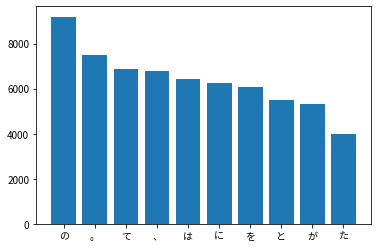

In [90]:
import matplotlib.pyplot as plt

top = c[0:10]
x = [t[0] for t in top]
y = [t[1] for t in top]
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.bar( x, y, align="center")
plt.xticks(ticks=range(0,len(x)),labels=x)
print(x)
print(y)



### 37. 「猫」と共起頻度の高い上位10語

[('の', 391), ('は', 272), ('、', 252), ('に', 250), ('を', 232), ('て', 229), ('。', 209), ('と', 202), ('が', 180), ('で', 170)]


<BarContainer object of 10 artists>

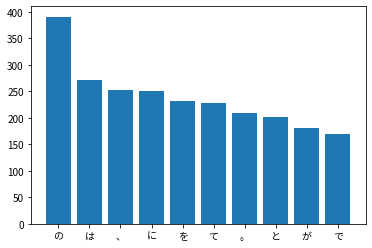

In [107]:
snos = { l["sno"] for l in lines if l["surface"]=="猫"}
len(snos)

words = []
for sno in snos:
  words += [l["surface"] for l in lines if l["sno"]==sno and l["surface"] != "猫"]
#for l in lines:

c = collections.Counter(words).most_common()
top = c[0:10]
print(top)

x = [t[0] for t in top]
y = [t[1] for t in top]
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.bar( x, y, align="center")
